# Analysis of confout.pdb files

This is to check progress of a certain bead through the simulation to be sure it's not drifting too far in one way. Ideally, you have all beads (or every other) for the entire string so far (so for 200 iterations, a 200 frame simulation)

You use `per_bead_confout.sh` to get the input file for this

In [1]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.distances as d
import matplotlib.pyplot as plt
from gate_functions import *

In [2]:
indir = '../confout_files/measure_per_bead/'

influx = []
bead_l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
for bead in bead_l:
    influx.append(mda.Universe('%s/%s.bead_%i.string.pdb' %(indir, 'influx_BFRU_gate_CV', bead)))

/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/home/semccomas/anaconda3/envs/string_method/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


In [66]:
dist_list_by_bead = []
fructose_selection = 'index 7515 7514'   #specifically, OH group of C6 group
N287_selection = "index 4531 4532 4533"  #specifically, NH2 group of N311
#fructose_selection = "resname BFRU"
#N3287_selection = "resid 287"



for bead in influx:
    dist_list = []
    fructose = bead.select_atoms(fructose_selection)  
    N287 = bead.select_atoms(N287_selection) 
    
    for ts in bead.trajectory:
        dist_list.append(np.min(d.distance_array(fructose.positions, N287.positions, box=ts.dimensions)))
    dist_list_by_bead.append(dist_list)

In [67]:
colormap_colors = 'viridis_r'
cmap_vals = plt.cm.get_cmap(colormap_colors)
color_vals = cmap_vals(np.linspace(0,1,len(bead_l)))

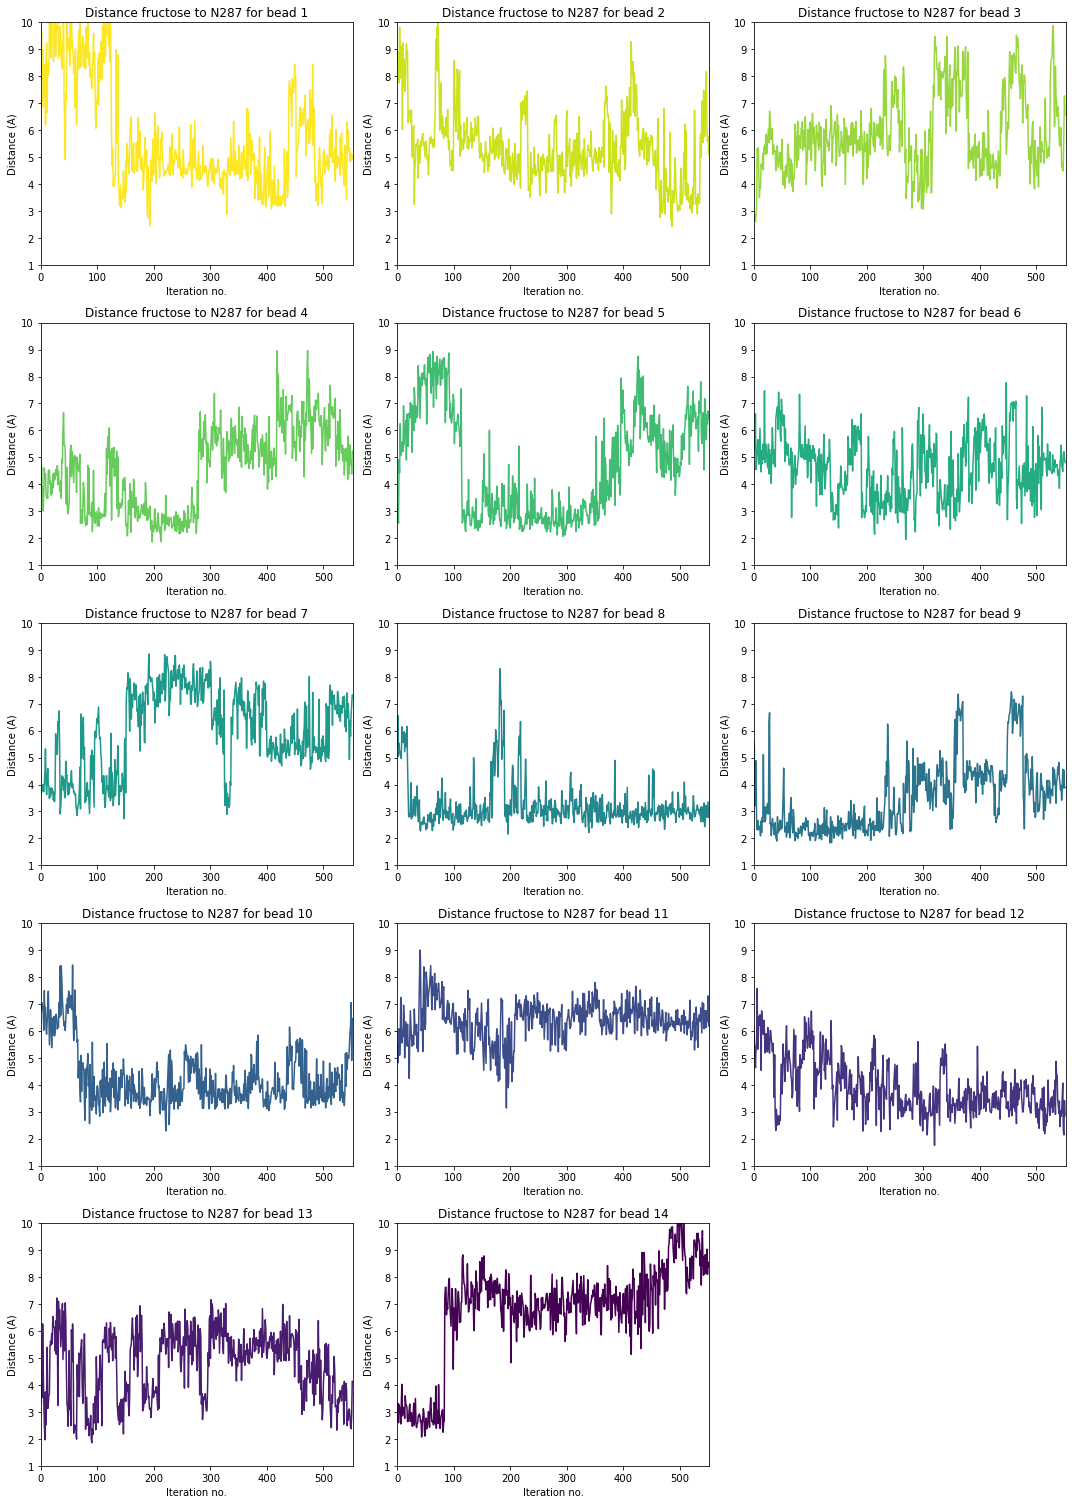

In [68]:
from math import ceil
num_cols = 3
fig, ax = plt.subplots(ceil(len(bead_l) / num_cols), num_cols, figsize=(15, 3 * ceil(len(bead_l) / 2)))
ax = ax.flatten()

if len(bead_l) % num_cols:
    fig.delaxes(ax[-1])   
    ax = ax[:-1]

for n,bead in enumerate(dist_list_by_bead):
    ax[n].plot(bead, color = color_vals[n],)
    ax[n].set_xlim(0, 552)
    ax[n].set_ylim(1,10)
    #ax[n].legend()
    ax[n].set_title(f"Distance fructose to N287 for bead {bead_l[n]}")    
    ax[n].set_xlabel("Iteration no.")
    ax[n].set_ylabel("Distance (A)")

plt.tight_layout()

figdir = "../images_figs/confout_file_analysis/sugar_coordination/compare_sugar_coord_by_bead"

plt.savefig(f"{figdir}/distances.fructose_{fructose_selection.replace(' ', '_')}.N287_{N287_selection.replace(' ', '_')}.png")

In [102]:
## you could also just say "name C1" if you want carbons but this is hydroxyl groups of each carbon
## C5 doesn't have an OH group but it is bonded to the oxygen O5 

fructose_groups = {"C1":"index 7519 7520", "C2":"index 7507 7508", "C3":"index 7523 7524",\
                   "C4":"index 7527 7528", "C5":"index 7505", "C6":"7514 7515"}

binding_site_res = [22, 25, 26, 29, 136, 160, 163, 164, 167, 281, 282, 286, 287, 290, 291, 318, 322, 380, 384, 385, 386, 389, 411, 412, 413]
# ' '.join(map(str, binding_site_res))

#binding_site_res = 'resid 22 25 26 29 136 160 163 164 167 281 282 286 287 290 291 318 322 380 384 385 386 389 411 412 413'

In [9]:
t = influx[0]

In [89]:
b = t.select_atoms(binding_site_res)
f = t.select_atoms('index 7519 7520')
test = []
for time in t.trajectory[0]:
    binding_dists = []
    test.append(d.distance_array(f.positions, b.positions, box=ts.dimensions))
    
test = np.array(test)

In [97]:
np.shape(test[0])

(1, 392)

In [100]:
print(l)

[22, 25, 26, 29, 136, 160, 163, 164, 167, 281, 282, 286, 287, 290, 291, 318, 322, 380, 384, 385, 386, 389, 411, 412, 413]


'22 25 26 29 136 160 163 164 167 281 282 286 287 290 291 318 322 380 384 385 386 389 411 412 413'

# OLD

# Gate COM detection
This is an adaptation of the EC plots in the per_iteration_analysis, but principal is the same

Adding a line of best fit can show if there is a concerning trend in a direction


In [3]:
#SKIP for now
#EC_influx,IC_influx = make_gate_arr(influx, gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])
#EC_efflux,IC_efflux = make_gate_arr(efflux, gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])

#EC_list = [EC_influx, EC_efflux]
#IC_list = [IC_influx, IC_efflux]

#gate_dist_over_time(EC_list, IC_list, label_list=["influx","efflux"], color_list = ['green', 'orange'])

In [6]:
EC_influx,IC_influx = make_gate_arr(influx, gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])
EC_model, IC_model = make_gate_arr(mda.Universe('../../../steered/analysis/ref_models/OUT-OCC.start.gro'), gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])

#gate_dist_over_time([EC_influx], [IC_influx], label_list = ['EC_influx'], color_list=['red'])

returning EC gate, IC gate dists
returning EC gate, IC gate dists


Plot change in EC & IC from time, can use `gate_dist_over_time` to cheat

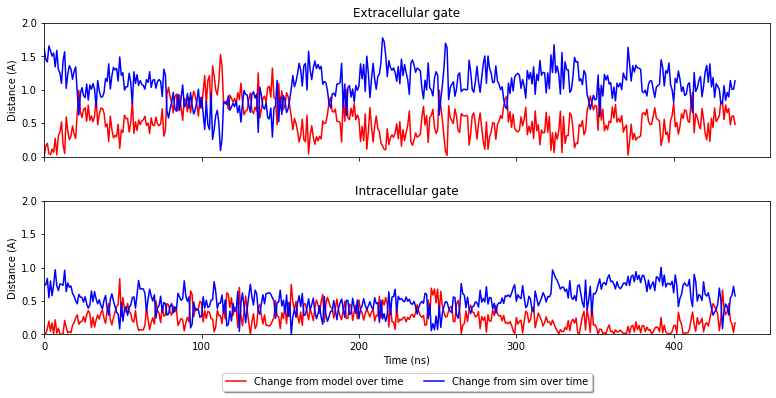

In [7]:
EC_start_change = abs(EC_influx[0] - EC_influx)
IC_start_change = abs(IC_influx[0] - IC_influx)

EC_end_change = abs(EC_model - EC_influx)
IC_end_change = abs(IC_model - IC_influx)

gate_dist_over_time([EC_start_change, EC_end_change], [IC_start_change, IC_end_change],\
                    label_list = ['Change from model over time', 'Change from sim over time'], color_list=['red', 'blue'],\
                   ylim=(0,2))

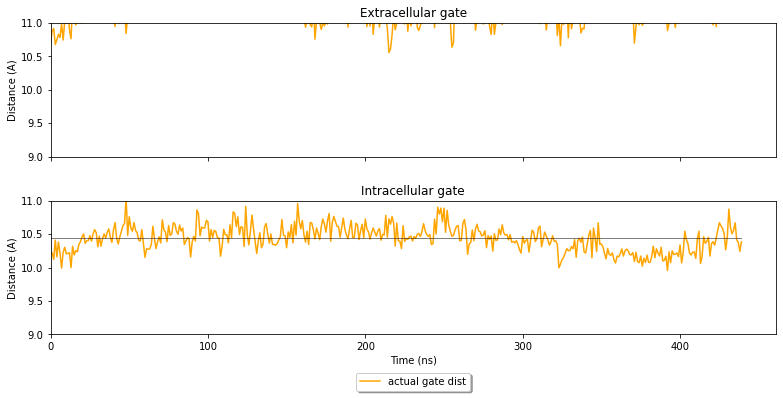

In [9]:
gate_dist_over_time(EC_list=[EC_influx], IC_list=[IC_influx], label_list=["actual gate dist"], \
                    color_list= ['orange'], ylim=(9,11), trending_line = True)

In [7]:
IC_influx[-1]

11.812544809875492

In [11]:
%matplotlib widget
plot_gate_scatter(np.array(EC_influx)[[0,250,349]], np.array(IC_influx)[[0,250,349]], colormap = 'viridis')
plt.show()
#influx = mda.Universe('%s/%s.bead_%i.string.pdb' %(indir, 'influx_apo_gate_CV', bead[0]))
#ls ../confout_files/measure_per_bead/influx_apo_gate_CV.bead_7.string.pdb

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


# RMSD of protein
Always good to check

/home/semccomas/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


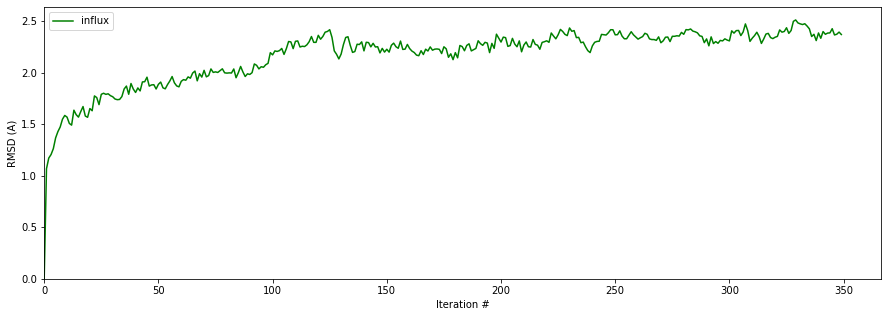

In [8]:
compare_RMSD([influx], label_list=['influx'], color_list = ['green'])

Skip for now

In [9]:
'''
modeldir = '../../../steered/analysis/ref_models'

model_names = ["OUT.equilib.200ns", "OUT-OCC.start", "OCC.start", "IN-OCC.start", "IN.start"]
color_l = ["red", "blue", "green", "orange", "pink"]

model_l = []
for model in model_names:
    model_l.append(mda.Universe(f"{modeldir}/{model}.gro"))
'''

'\nmodeldir = \'../../../steered/analysis/ref_models\'\n\nmodel_names = ["OUT.equilib.200ns", "OUT-OCC.start", "OCC.start", "IN-OCC.start", "IN.start"]\ncolor_l = ["red", "blue", "green", "orange", "pink"]\n\nmodel_l = []\nfor model in model_names:\n    model_l.append(mda.Universe(f"{modeldir}/{model}.gro"))\n'

In [39]:
in_occ_model = mda.Universe('../../../steered/analysis/ref_models/OCC.start.gro')
in_occ_sim = mda.Universe('../../../steered/analysis/ref_atom_sim/OCC.370ns.gro')

model_l = [in_occ_model, in_occ_sim]
model_names = ['Occ model', 'Occ sim']

In [40]:
import MDAnalysis.analysis.rms
rmsd_l = []

for model in model_l:
    RMSD = MDAnalysis.analysis.rms.RMSD(reference=model.select_atoms("protein"), \
                                        atomgroup = influx.select_atoms("protein"), \
                                        center = True, select="backbone", \
            groupselections=["backbone and (resid 1-205 or resid 265-455)",\
            "backbone and (resid 1-51 or resid 265-300 or resid 118-146 or resid 364-395)",\
                             "resid 30-37 or resid 289-295 or resid 136-145 or resid 386-394"])  

    RMSD.run(0)
    rmsd = RMSD.rmsd.T
    rmsd_l.append(rmsd)

/home/semccomas/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


No handles with labels found to put in legend.


Text(0.5, 0, 'Iteration')

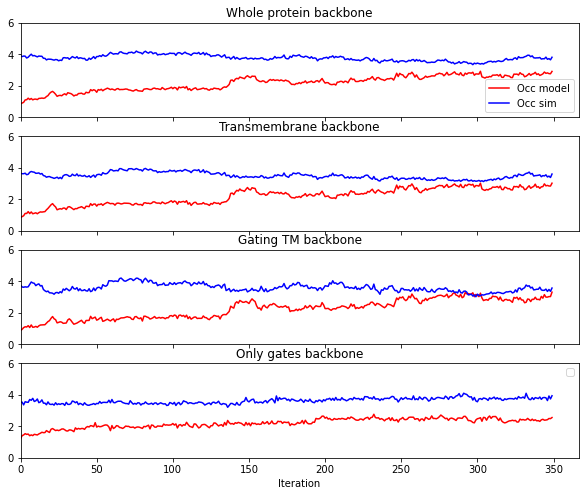

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, sharex = True, figsize = (10,8))
color_l = ["red", "blue", "green", "orange", "pink"]
ylim = (0, 6)
for n, rmsd in enumerate(rmsd_l):
    time = rmsd[1]
    ax1.plot(time, rmsd[2], label = model_names[n], color = color_l[n])
    ax2.plot(time, rmsd[3], color = color_l[n])
    ax3.plot(time, rmsd[4], color = color_l[n])
    ax4.plot(time, rmsd[5], color = color_l[n])
    ax1.legend()

ax1.set_title('Whole protein backbone')
ax2.set_title("Transmembrane backbone")
ax3.set_title("Gating TM backbone")
ax4.set_title("Only gates backbone")
plt.legend()
plt.xlim(0)
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax3.set_ylim(ylim)
ax4.set_ylim(ylim)

ax4.set_xlabel("Iteration")

# parse heatmap from VMD to assess where in the protein these RMSD changes are coming from

vmd selection - resid 30 to 37 289 to 295 136 to 145 386 to 394

In [45]:
hmap = np.loadtxt('../textfiles_out/VMD_RMSD/influx_apo_gate_CV.bead7.1_350.whole_protein.hm',\
                 delimiter=";", skiprows =10, dtype = str)

headers = hmap[:,0]
resids = [int(i.split(':')[0]) for i in headers]
hmap = hmap[:,1:-1].astype(float)  #first column, skip. Last value in arr is empty, so skip too

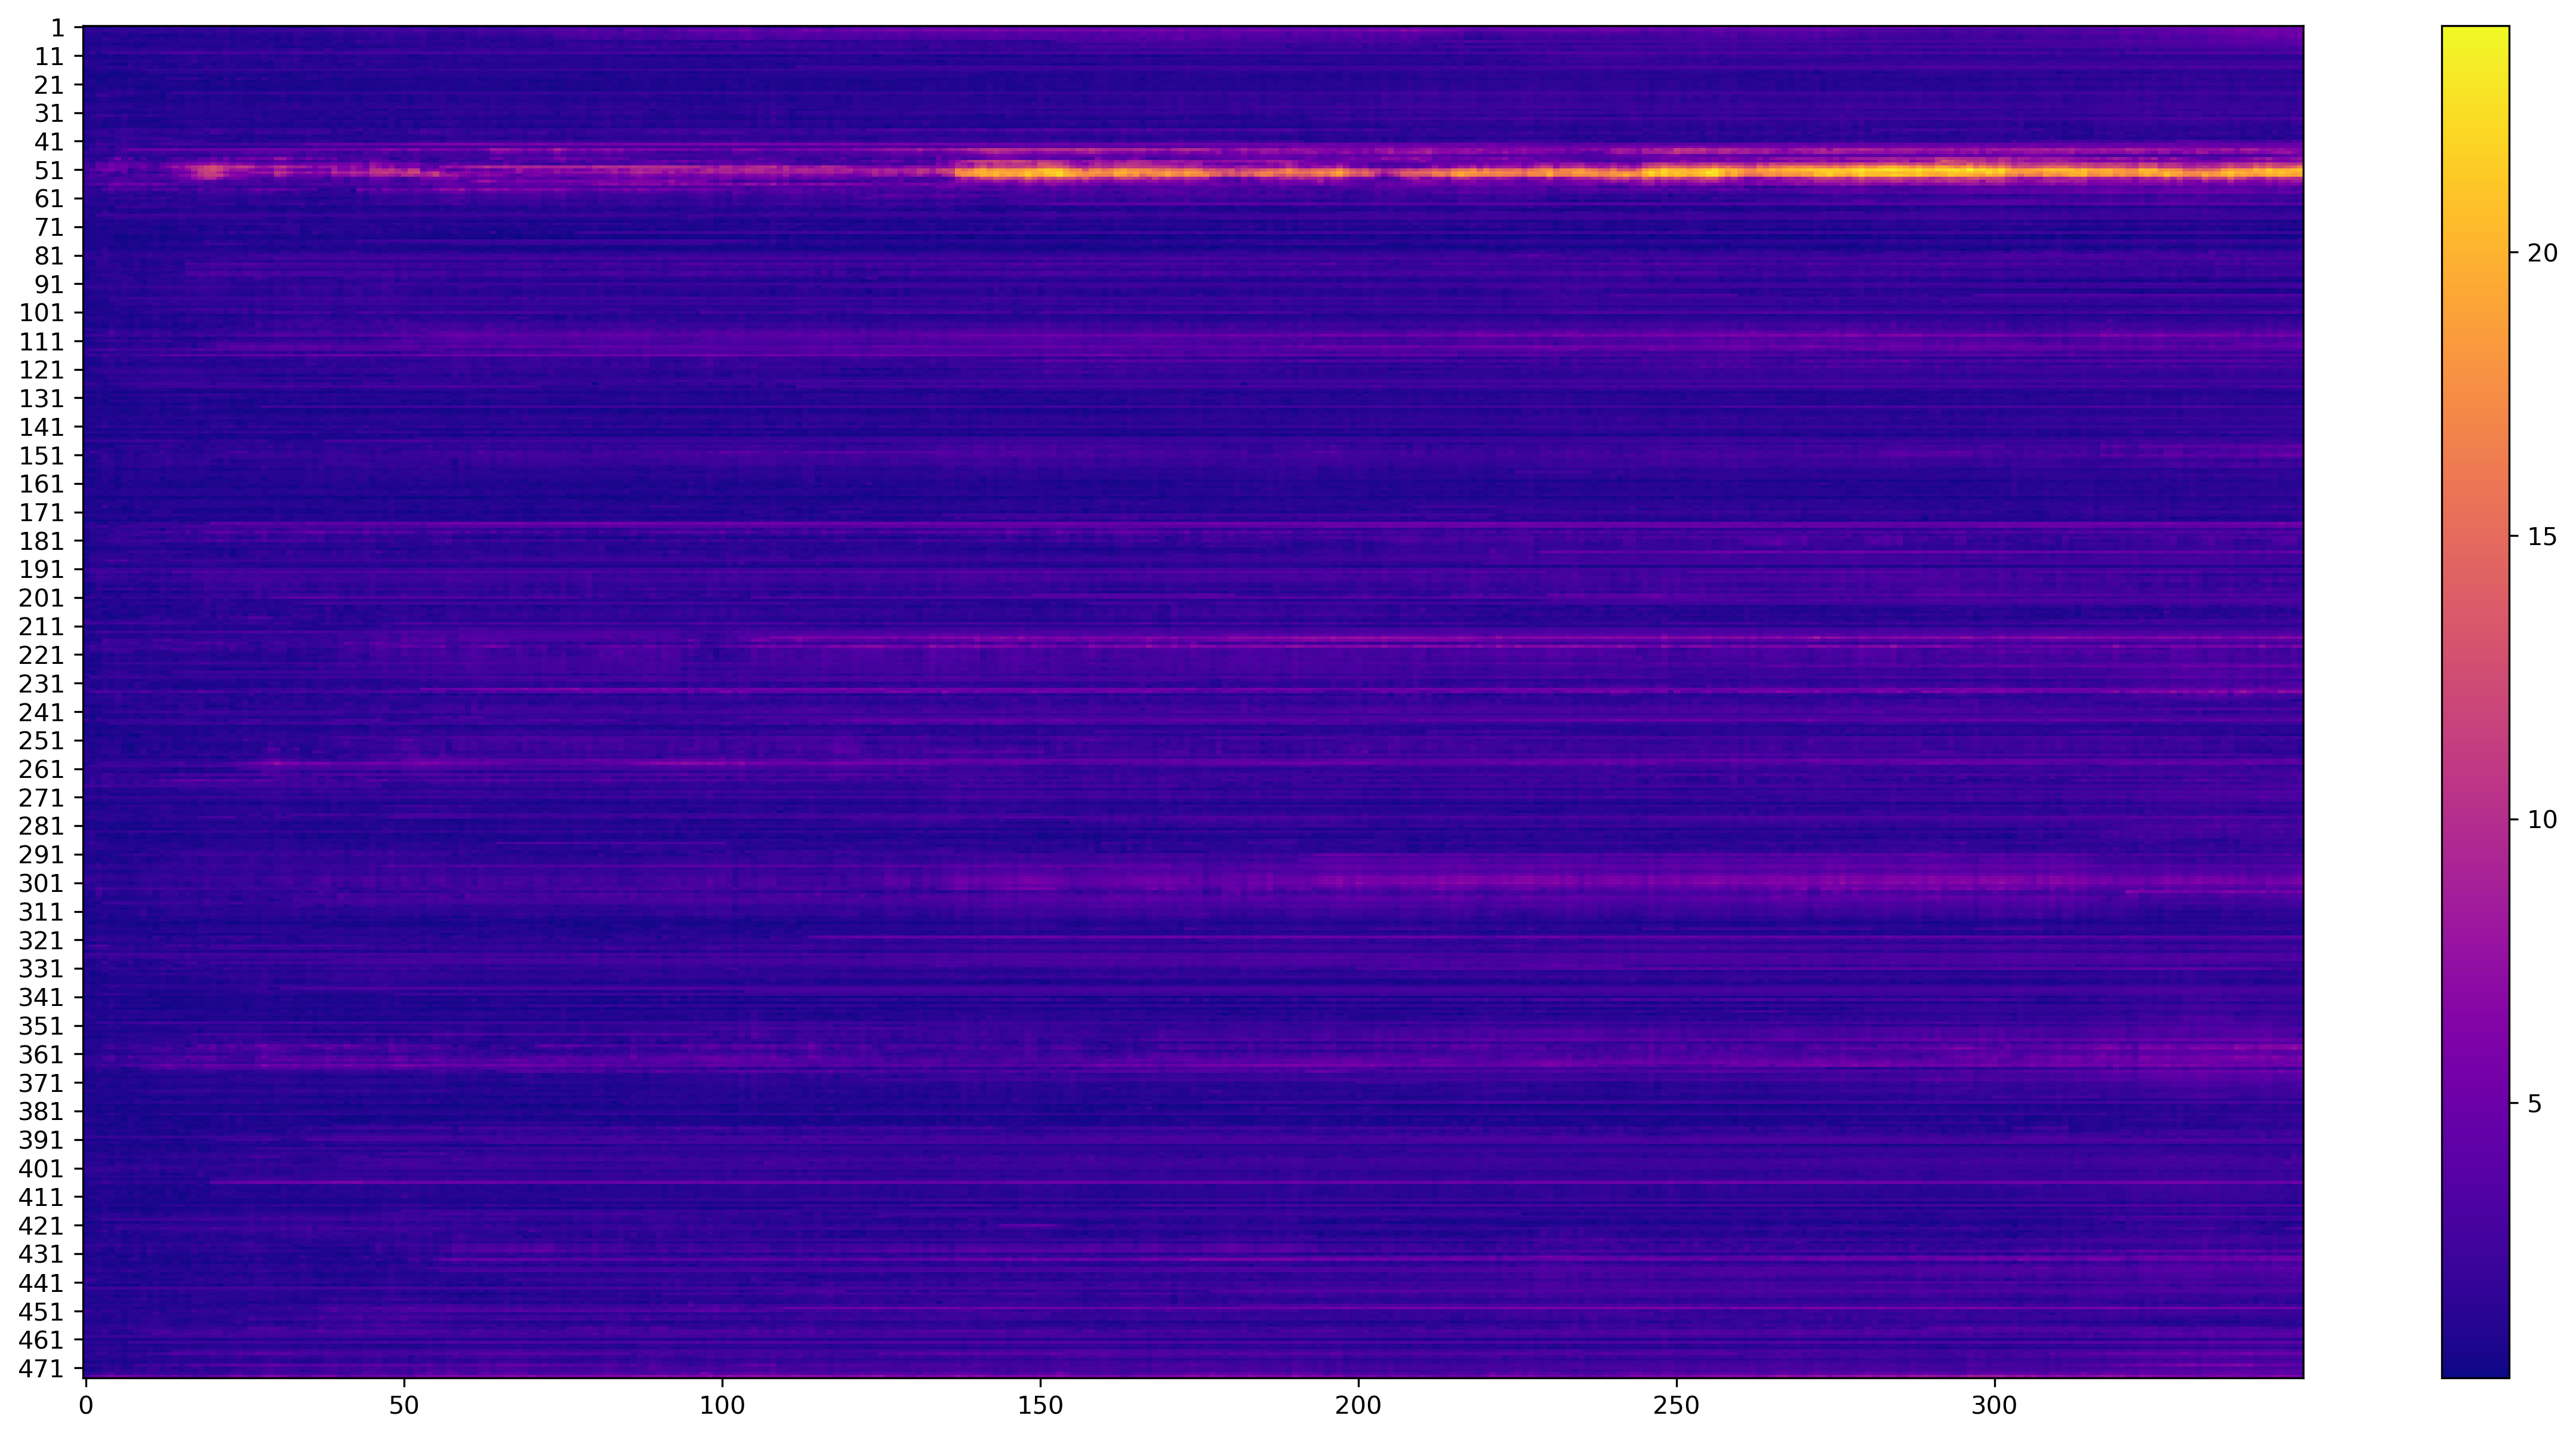

In [47]:
skip_label = 10
f = plt.figure(figsize=(20,10),dpi=300)
ax = f.add_subplot()
ax.set_yticks(np.arange(0, len(resids), skip_label))
ax.set_yticklabels(resids[::skip_label])
heatmap = ax.imshow(hmap, cmap='plasma', aspect = 'auto')
f.colorbar(heatmap, ax=ax)

In [ ]:
resids[::5]